In [ ]:
#load the data

import pandas as pd
file_path = '/content/yelp_labelled.txt'

# Read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    reviews = file.readlines()

# Create a DataFrame from the reviews
yelp_df = pd.DataFrame(reviews, columns=['review'])

pd.set_option('display.max_columns', None)

yelp_df.head(10)


,review
0,Wow... Loved this place.\t1\n
1,Crust is not good.\t0\n
2,Not tasty and the texture was just nasty.\t0\n
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho....
6,Honeslty it didn't taste THAT fresh.)\t0\n
7,The potatoes were like rubber and you could te...
8,The fries were great too.\t1\n
9,A great touch.\t1\n


In [ ]:
#presence of unusual characters

import re

# Function to find unusual characters
def find_unusual_characters(text):
    unusual_chars = re.findall(r'[^\w\s,]', text)  # Find characters that are not alphanumeric, whitespace, or comma
    return unusual_chars

# Apply the function to the reviews
yelp_df['unusual_characters'] = yelp_df['review'].apply(find_unusual_characters)

# Count reviews with unusual characters
unusual_char_count = yelp_df['unusual_characters'].apply(lambda x: len(x)).sum()

#see all rows in the output
#pd.set_option('display.max_rows', None)

print(f'Total unusual characters found: {unusual_char_count}')
print(f'Sample unusual characters: {yelp_df["unusual_characters"]}')


Total unusual characters found: 1601
Sample unusual characters: 0      [., ., ., .]
1               [.]
2               [.]
3               [.]
4               [.]
           ...     
995             [.]
996             [.]
997             [.]
998          [', .]
999          [', .]
Name: unusual_characters, Length: 1000, dtype: object


In [ ]:
#vocabulary size
import nltk
nltk.download('punkt')
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize reviews
yelp_df['tokens'] = yelp_df['review'].apply(word_tokenize)

# Flatten the list of tokens and count unique words
all_tokens = [token for sublist in yelp_df['tokens'] for token in sublist]
vocabulary_size = len(set(all_tokens))

print(f'Vocabulary size: {vocabulary_size}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Vocabulary size: 2354


In [ ]:
#proposed word embedding length

# Example choice of word embedding length
embedding_length = 100
print(f'Proposed word embedding length: {embedding_length}')


Proposed word embedding length: 100


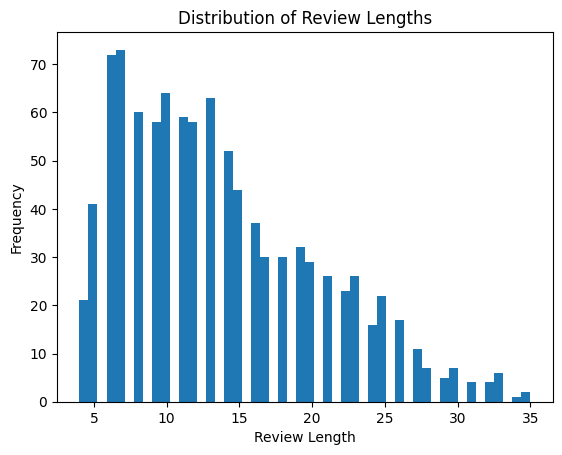

Chosen maximum sequence length: 26


In [ ]:
#statistical justification for chosen max sequence length

import matplotlib.pyplot as plt

# Calculate review lengths
yelp_df['review_length'] = yelp_df['tokens'].apply(len)

# Plot the distribution of review lengths
plt.hist(yelp_df['review_length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

# Choose a max sequence length based on the distribution (e.g., 95th percentile)
max_seq_length = int(yelp_df['review_length'].quantile(0.95))
print(f'Chosen maximum sequence length: {max_seq_length}')

In [ ]:
#clean and label the data

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download the necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define the cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)  # Remove special characters
    text = text.lower()  # Lowercase text
    text = text.strip()  # Remove whitespace
    tokens = text.split()  # Tokenize text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]
    return ' '.join(tokens)

# Verify the column name and adjust accordingly
print(yelp_df.columns)

# Apply the cleaning function to your dataset using the correct column name
yelp_df['cleaned_text'] = yelp_df['review'].apply(clean_text)

# Ensure your dataset has a column label with sentiment categories: positive, neutral, negative
def assign_label(text):
    positive_words = ['love', 'great', 'fantastic', 'excellent']
    negative_words = ['hate', 'bad', 'terrible', 'awful']

    if any(word in text for word in positive_words):
        return 'positive'
    elif any(word in text for word in negative_words):
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new 'label' column
yelp_df['label'] = yelp_df['cleaned_text'].apply(assign_label)

# Create a new DataFrame for the cleaned and labeled data
cleaned_yelp_df = yelp_df[['review', 'cleaned_text', 'label']]

# Print the first few rows to verify
print(cleaned_yelp_df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Index(['review', 'unusual_characters', 'tokens', 'review_length'], dtype='object')
                                              review  \
0                      Wow... Loved this place.\t1\n   
1                            Crust is not good.\t0\n   
2     Not tasty and the texture was just nasty.\t0\n   
3  Stopped by during the late May bank holiday of...   
4  The selection on the menu was great and so wer...   

                                        cleaned_text     label  
0                                    wow loved place  positive  
1                                         crust good   neutral  
2                                tasty texture nasty   neutral  
3  stopped late may bank holiday rick steve recom...  positive  
4                         selection menu great price  positive  


In [ ]:
#normalize text during the tokenization process

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



# Function to tokenize and normalize text
def tokenize_normalize(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Normalization
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Apply tokenization and normalization to the 'cleaned_text' column
cleaned_yelp_df['normalized_tokens'] = cleaned_yelp_df['cleaned_text'].apply(tokenize_normalize)

# Print the DataFrame to verify the results
print(cleaned_yelp_df[['cleaned_text', 'normalized_tokens']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          cleaned_text  \
0                                      wow loved place   
1                                           crust good   
2                                  tasty texture nasty   
3    stopped late may bank holiday rick steve recom...   
4                           selection menu great price   
..                                                 ...   
995                  think food flavor texture lacking   
996                            appetite instantly gone   
997                    overall impressed would go back   
998  whole experience underwhelming think well go n...   
999  hadnt wasted enough life poured salt wound dra...   

                                     normalized_tokens  
0                                  [wow, loved, place]  
1                                        [crust, good]  
2                              [tasty, texture, nasty]  
3    [stopped, late, may, bank, holiday, rick, stev...  
4                 

<ipython-input-7-295e5433cde5>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_yelp_df['normalized_tokens'] = cleaned_yelp_df['cleaned_text'].apply(tokenize_normalize)


In [ ]:
#text vectorization

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Initialize Tokenizer
tokenizer = Tokenizer(num_words=5000)  # Limit vocabulary size to 5000 most frequent words
tokenizer.fit_on_texts(cleaned_yelp_df['cleaned_text'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(cleaned_yelp_df['cleaned_text'])

# Vocabulary index
word_index = tokenizer.word_index

# Pad sequences to ensure uniform length (assuming max length is 26)
maxlen = 26
data_padded = pad_sequences(sequences, maxlen=maxlen)

# Example of accessing the first padded sequence
print(f"Example of padded sequence:\n{data_padded[0]}")

# Example of accessing word index
print(f"\nExample of word index:\n{word_index}")


Example of padded sequence:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 329  97   2]

Example of word index:
{'food': 1, 'place': 2, 'good': 3, 'service': 4, 'great': 5, 'back': 6, 'time': 7, 'like': 8, 'go': 9, 'really': 10, 'best': 11, 'would': 12, 'ever': 13, 'restaurant': 14, 'dont': 15, 'also': 16, 'one': 17, 'never': 18, 'friendly': 19, 'nice': 20, 'amazing': 21, 'delicious': 22, 'vega': 23, 'im': 24, 'get': 25, 'came': 26, 'ive': 27, 'love': 28, 'experience': 29, 'pretty': 30, 'staff': 31, 'eat': 32, 'u': 33, 'minute': 34, 'even': 35, 'disappointed': 36, 'wont': 37, 'server': 38, 'bad': 39, 'much': 40, 'star': 41, 'definitely': 42, 'got': 43, 'well': 44, 'going': 45, 'steak': 46, 'pizza': 47, 'price': 48, 'made': 49, 'say': 50, 'salad': 51, 'first': 52, 'dish': 53, 'chicken': 54, 'menu': 55, 'could': 56, 'burger': 57, 'think': 58, 'better': 59, 'always': 60, 'way': 61, 'want': 62, 'fresh': 63, 'table': 64, 'worst': 65, 'ordered':

In [ ]:
#pre padding

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Collect all unique tokens from the 'normalized_tokens' column
all_tokens = [token for tokens_list in cleaned_yelp_df['normalized_tokens'] for token in tokens_list]
unique_tokens = list(set(all_tokens))

# Create a token to index mapping
token_to_index = {token: idx + 1 for idx, token in enumerate(unique_tokens)}  # Start index from 1
token_to_index['<PAD>'] = 0  # Add padding token

# Function to convert tokens to indices
def tokens_to_indices(tokens_list, token_to_index):
    return [[token_to_index[token] for token in tokens] for tokens in tokens_list]

# Convert tokens in 'normalized_tokens' to indices
cleaned_yelp_df['token_indices'] = tokens_to_indices(cleaned_yelp_df['normalized_tokens'], token_to_index)

# Function to pad sequences with pre-padding
def pad_sequences_pre(sequences, max_length, padding_value=0):
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='pre', truncating='post', value=padding_value)
    return padded_sequences.tolist()  # Convert to list of lists

# Pad sequences in 'token_indices' column with pre-padding
max_length = 26
cleaned_yelp_df['padded_tokens'] = pad_sequences_pre(cleaned_yelp_df['token_indices'], max_length, padding_value=token_to_index['<PAD>'])

# Print original and padded sequences
print("Original sequences and padded sequences:")
for idx, row in cleaned_yelp_df.iterrows():
    print(f"Review: {row['cleaned_text']}")
    print(f"Original tokens: {row['normalized_tokens']}")
    print(f"Token indices: {row['token_indices']}")
    print(f"Padded tokens: {row['padded_tokens']}")
    print()



<ipython-input-9-7445a91f605d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_yelp_df['token_indices'] = tokens_to_indices(cleaned_yelp_df['normalized_tokens'], token_to_index)


Streaming output truncated to the last 5000 lines.
Review: wow loved place
Original tokens: ['wow', 'loved', 'place']
Token indices: [1545, 1795, 167]
Padded tokens: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1545, 1795, 167]

Review: crust good
Original tokens: ['crust', 'good']
Token indices: [1634, 1461]
Padded tokens: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1634, 1461]

Review: tasty texture nasty
Original tokens: ['tasty', 'texture', 'nasty']
Token indices: [180, 1210, 832]
Padded tokens: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 180, 1210, 832]

Review: stopped late may bank holiday rick steve recommendation loved
Original tokens: ['stopped', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommendation', 'loved']
Token indices: [1686, 1574, 986, 1739, 1654, 722, 285, 1385, 1795]
Padded tokens: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1686, 1574, 986, 1739, 1654, 722, 285, 1385

In [ ]:
# Print a single padded sequence for screenshot
single_review_index = 0  # Change index to get a different review
review = cleaned_yelp_df.loc[single_review_index, 'cleaned_text']
original_tokens = cleaned_yelp_df.loc[single_review_index, 'normalized_tokens']
token_indices = cleaned_yelp_df.loc[single_review_index, 'token_indices']
padded_tokens = cleaned_yelp_df.loc[single_review_index, 'padded_tokens']

print(f"Review: {review}")
print(f"Original tokens: {original_tokens}")
print(f"Token indices: {token_indices}")
print(f"Padded tokens: {padded_tokens}")


Review: wow loved place
Original tokens: ['wow', 'loved', 'place']
Token indices: [1545, 1795, 167]
Padded tokens: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1545, 1795, 167]


In [ ]:
# split the dataset properly - train, test, validation
#Identify how many categories of sentiment will be used and an activation function for the final dense layer of the network.


from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import tensorflow as tf
import random

# Set random seeds for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)


# Split data into training and temporary (remaining) data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    cleaned_yelp_df['padded_tokens'], cleaned_yelp_df['label'], test_size=0.10, random_state=42, stratify=cleaned_yelp_df['label']
)

# Further split temporary data into validation and final training data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=0.1111, random_state=42, stratify=y_train_temp
)

# Print sizes of each set
print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")
print(f"Testing data size: {len(X_test)}")

# Convert data to numpy arrays and one-hot encode labels
X_train = np.array(list(X_train))
X_val = np.array(list(X_val))
X_test = np.array(list(X_test))
y_train = np.array(pd.get_dummies(y_train))
y_val = np.array(pd.get_dummies(y_val))
y_test = np.array(pd.get_dummies(y_test))

# Define the number of output classes
num_classes = y_train.shape[1]  # Number of unique labels

# Initialize the model
model = Sequential()

# Add an embedding layer
input_dim = 2354  # vocabulary size
output_dim = 100  # embedding size
input_length = 26  # Example input length (number of words per input)
model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

# Add an LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(64))

# Add a fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Add the final dense layer with softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Print details about sentiment categories and activation function
print(f"Number of sentiment categories: {num_classes}")
print(f"Activation function for the final dense layer: softmax")

# Define EarlyStopping callback with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Print the stopping criteria and final accuracy
print(f"Stopped after {len(history.epoch)} epochs due to early stopping.")
print(f"Best validation accuracy: {max(history.history['val_accuracy'])}")


Training data size: 800
Validation data size: 100
Testing data size: 100
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 26, 100)           235400    
                                                                 
 lstm (LSTM)                 (None, 26, 128)           117248    
                                                                 
 dropout (Dropout)           (None, 26, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                 

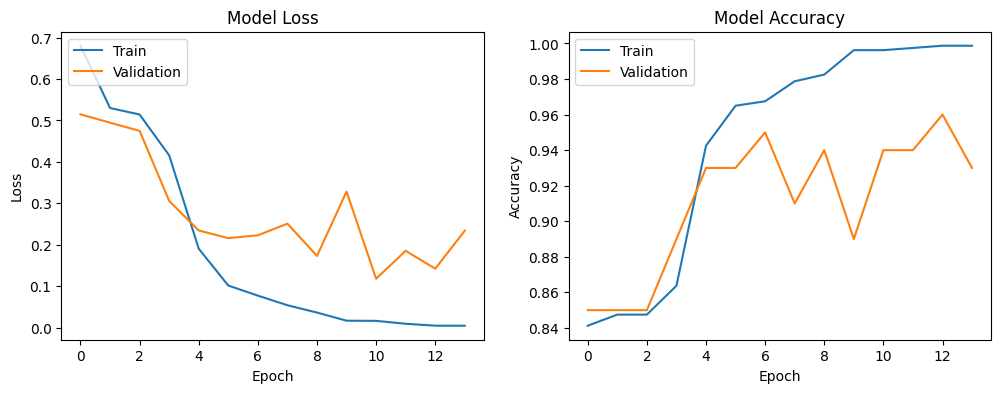

In [ ]:
#viz of model training process
#line graph of loss and accuracy

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values (or another metric)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
#save the trained network within the neural network

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Train the model with the callbacks
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100,
                    callbacks=[early_stopping, model_checkpoint])

# Save the final model (optional)
model.save('final_model.h5')


Epoch 1/100
25/25 [==============================] - 2s 68ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.1305 - val_accuracy: 0.9500
Epoch 2/100
 1/25 [>.............................] - ETA: 2s - loss: 0.0020 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 3s 126ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.1054 - val_accuracy: 0.9500
Epoch 3/100
25/25 [==============================] - 3s 110ms/step - loss: 0.0056 - accuracy: 0.9975 - val_loss: 0.1323 - val_accuracy: 0.9600
Epoch 4/100
25/25 [==============================] - 2s 63ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 0.9400
Epoch 5/100
25/25 [==============================] - 1s 56ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1846 - val_accuracy: 0.9500
Epoch 6/100
25/25 [==============================] - 2s 87ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1872 - val_accuracy: 0.9500
Epoch 7/100
25/25 [==============================] - 3s 110ms/step - loss: 5.7518e-04 - accuracy: 1.0000 - val_loss: 0.1791 - val_accuracy: 0.9500


In [ ]:
# Export copy of prepared dataset

from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Create a DataFrame with training data
train_data = pd.DataFrame({'tokens': list(X_train), 'label': list(y_train)})

# Define the file path in your Google Drive
file_path = '/content/drive/My Drive/prepared_training_data_1.csv'

# Save the prepared training dataset to a CSV file in Google Drive
train_data.to_csv(file_path, index=False)

print(f"Training data saved to {file_path}")


Mounted at /content/drive
Training data saved to /content/drive/My Drive/prepared_training_data_1.csv
